In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
import sys
os.environ["CODE_REPO_PATH"]="/home/haokunliu/past-interaction-learning"
os.environ["SERVER"]='dsi'
os.environ["PORT"]='6379'
code_repo_path = os.environ.get("CODE_REPO_PATH")

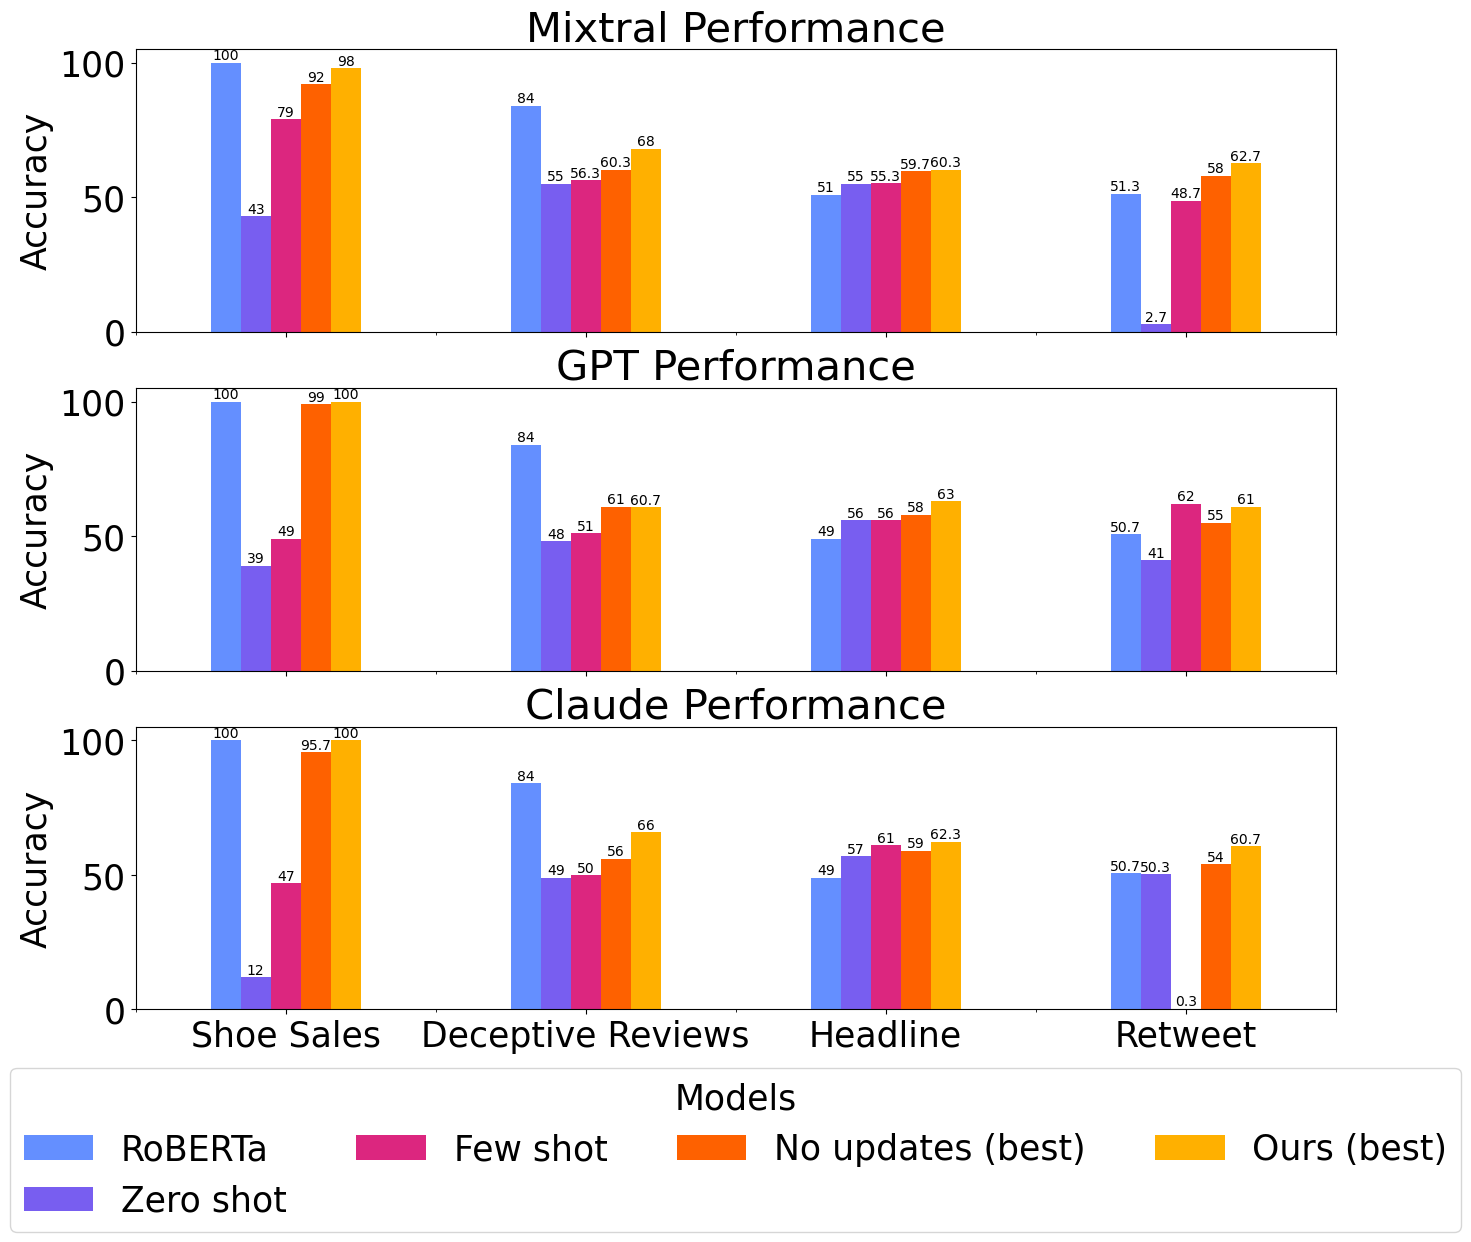

In [6]:
data_1 = {
    "RoBERTa": [100.0, 84.0, 51.0, 51.3],
    "Zero shot": [43.0, 55.0, 55.0, 2.7],
    "Few shot": [79.0, 56.3, 55.3, 48.7],
    "No updates (best)": [92.0, 60.3, 59.7, 58.0],
    "Ours (best)": [98.0, 68.0, 60.3, 62.7]
}


data_2 = {
    "RoBERTa": [100.0, 84.0, 49.0, 50.7],
    "Zero shot": [39.0, 48.0, 56.0, 41.0],
    "Few shot": [49.0, 51.0, 56.0, 62.0],
    "No updates (best)": [99.0, 61.0, 58.0, 55.0],
    "Ours (best)": [100.0, 60.7, 63.0, 61.0]
}

data_3 = {
    "RoBERTa": [100.0, 84.0, 49.0, 50.7],
    "Zero shot": [12.0, 49.0, 57.0, 50.3],
    "Few shot": [47.0, 50.0, 61.0, 0.3],
    "No updates (best)": [95.7, 56.0, 59.0, 54.0],
    "Ours (best)": [100.0, 66.0, 62.3, 60.7]
}

font = {'size'   : 25}

matplotlib.rc('font', **font)

df_1 = pd.DataFrame(data_1, index=["Shoe Sales", "Deceptive Reviews", "Headline", "Retweet"]).transpose()
df_2 = pd.DataFrame(data_2, index=["Shoe Sales", "Deceptive Reviews", "Headline", "Retweet"]).transpose()
df_3 = pd.DataFrame(data_3, index=["Shoe Sales", "Deceptive Reviews", "Headline", "Retweet"]).transpose()

pastel_colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']

fig, axes = plt.subplots(3, 1, figsize=(20,12), sharex=True)


df_1.transpose().plot(kind='bar', ax=axes[0], color=pastel_colors)
axes[0].set_title('Mixtral Performance')
axes[0].set_ylabel('Accuracy')
axes[0].legend().set_visible(False)

df_2.transpose().plot(kind='bar', ax=axes[1], color=pastel_colors)
axes[1].set_title('GPT Performance')
axes[1].set_ylabel('Accuracy')
axes[1].legend().set_visible(False) 
df_3.transpose().plot(kind='bar', ax=axes[2], color=pastel_colors)
axes[2].set_title('Claude Performance')
axes[2].set_ylabel('Accuracy')
axes[2].legend().set_visible(False)  

def add_value_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

# Add value labels for each subplot
for ax in axes:
    add_value_labels(ax)

for ax in axes:
    ax.tick_params(axis='x', rotation=0)


fig.subplots_adjust(bottom=0.15)
fig.subplots_adjust(top=0.95, left=0.2, right=0.8)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(df_1.columns), title='Models')

fig.savefig(f'{code_repo_path}/figures/figure_2.png')
plt.show()